# ANALISANDO NOTAS EM GERAL


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()


,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
#notas['nota'].unique()
#notas['nota'].value_counts()
notas.nota.unique()
notas.nota.value_counts()


4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [5]:
notas.shape


(100836, 4)

In [6]:
notas.nota.mean()


3.501556983616962

In [7]:
notas.nota.median()

3.5

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

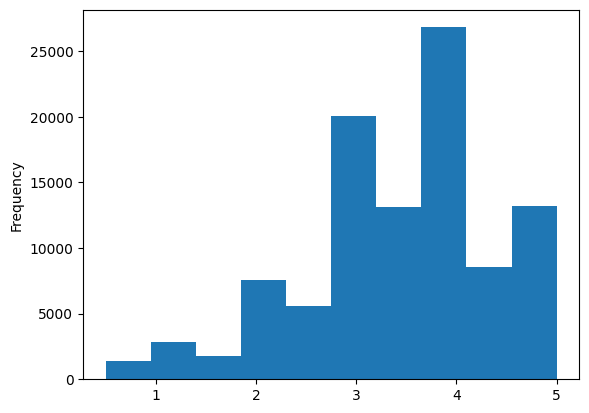

In [8]:
notas.nota.plot(kind='hist')
notas.nota.describe()

In [9]:
import seaborn as sns

<AxesSubplot: >

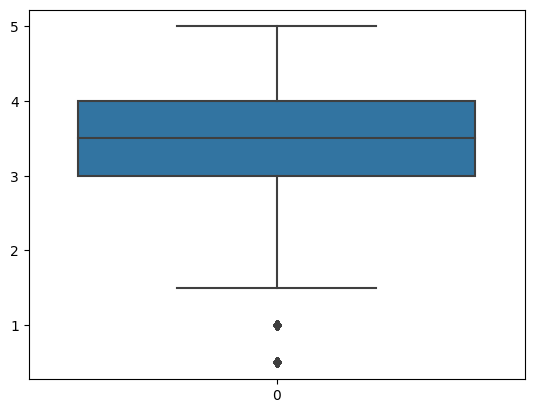

In [10]:
sns.boxplot(notas.nota)

# ANALISANDO NOTAS ESPECIFICAS POR FILME

In [11]:
notas.query("filmeId==1")

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [12]:
#notas.nota.query("filmeId==1")nao funciona, nota tem que vir depois da query
notas.query("filmeId==1").nota

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64

In [13]:
# Consulta de notas com a media dos filmes com ID 1
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [14]:
# Consulta de notas com a media dos filmes com ID 1
notas.query("filmeId==2").nota.mean()

3.4318181818181817

In [15]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [16]:
# a media por cada ID de filme, mas note que vai tirar a media de tudo, do usuario, da nota e do momento
notas.groupby("filmeId").mean()

,usuarioId,nota,momento
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [17]:
notas.groupby("filmeId").nota.mean()
# notas.groupby("filmeId").mean()["nota"] tbm funciona como codigo

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [18]:
#guardando em uma variavel
medias_por_filme =  notas.groupby("filmeId").nota.mean()
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<AxesSubplot: ylabel='Frequency'>

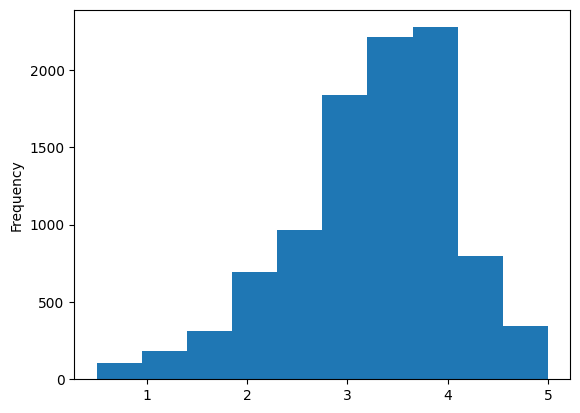

In [19]:
medias_por_filme.plot(kind="hist")

In [20]:
#usando seaborn
sns.boxplot(medias_por_filme)

KeyError: 0

In [21]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

C:\Users\Arthur\AppData\Local\Temp\ipykernel_26680\4102428911.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_por_filme)


<AxesSubplot: xlabel='nota', ylabel='Density'>

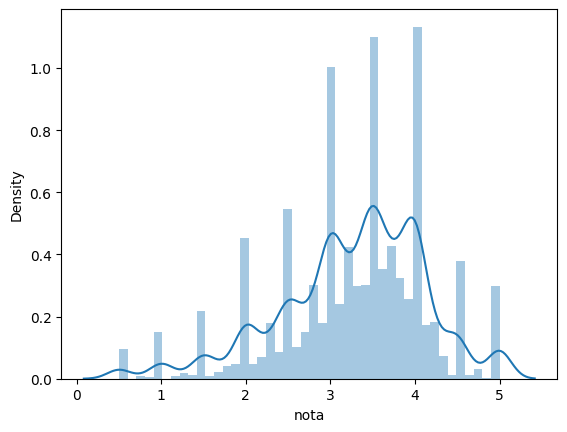

In [22]:
#histograma no seaborn chama distplot
sns.distplot(medias_por_filme)


C:\Users\Arthur\AppData\Local\Temp\ipykernel_26680\419465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_por_filme, bins = 5)


<AxesSubplot: xlabel='nota', ylabel='Density'>

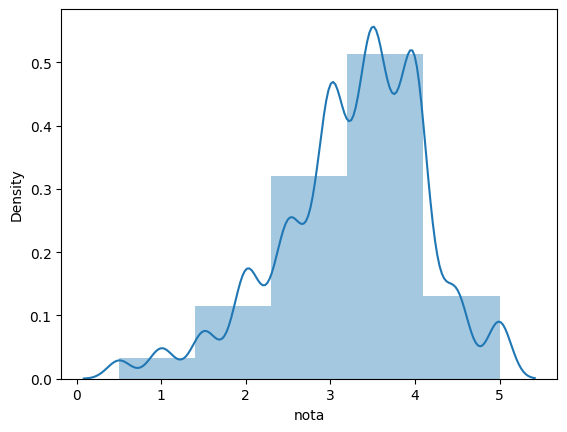

In [23]:
sns.distplot(medias_por_filme, bins = 5)

(array([ 108.,  185.,  309.,  694.,  962., 1840., 2211., 2275.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

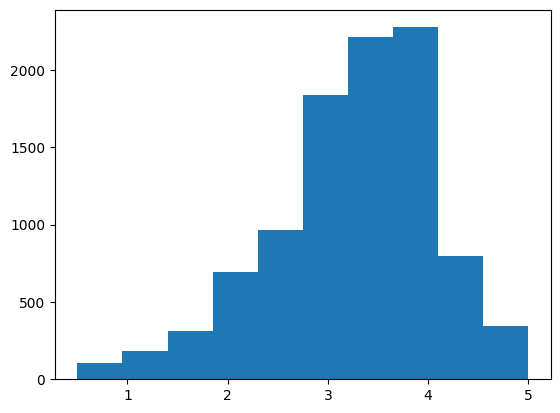

In [24]:
#Matplotlib
plt.hist(medias_por_filme)

<AxesSubplot: ylabel='nota'>

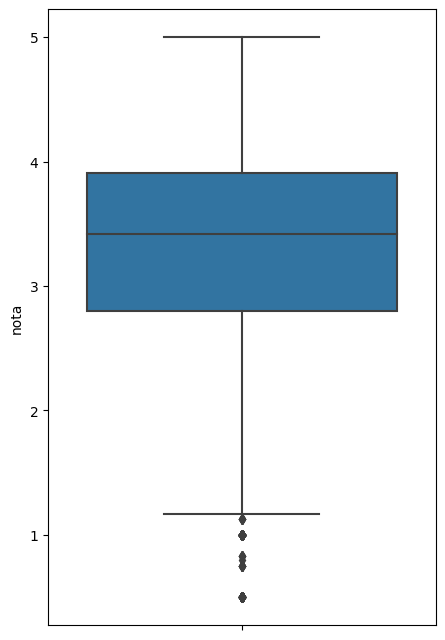

In [25]:
plt.figure(figsize=(5,8))

sns.boxplot(y=medias_por_filme)